In [35]:
#Data visualization for STAT 451 Final Project

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loading data and formatting

In [37]:
spotify_data = pd.read_csv('/Users/yunjuha/Desktop/STAT 451 Final Project/spotify_songs.csv')

#convert to datetime format & remove NA
spotify_data['track_album_release_date'] = pd.to_datetime(spotify_data['track_album_release_date'], errors='coerce')
spotify_data = spotify_data.dropna(subset=['track_album_release_date'])
spotify_data.set_index('track_album_release_date', inplace=True)

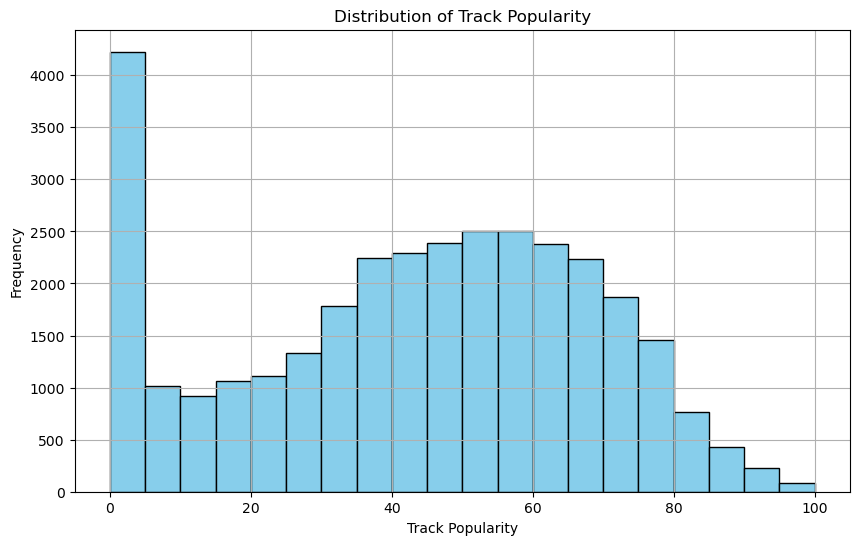

In [38]:
plt.figure(figsize=(10, 6))
plt.hist(spotify_data['track_popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


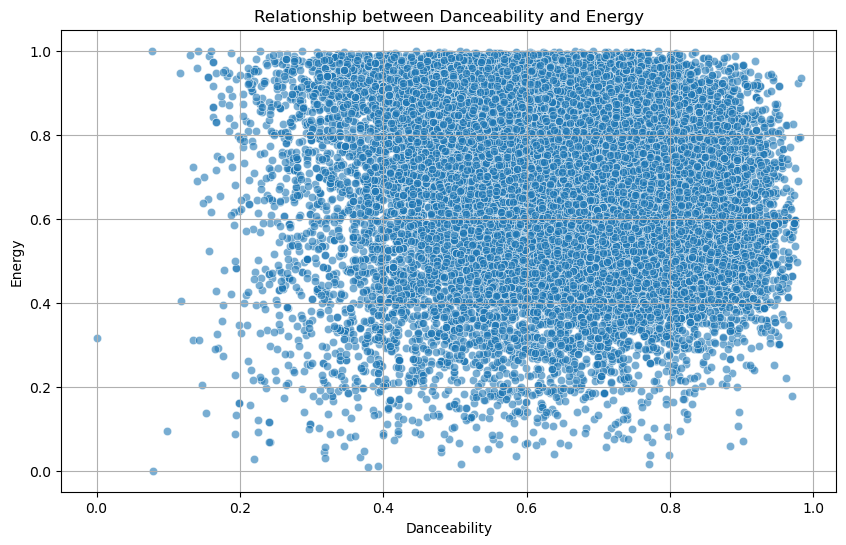

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(spotify_data['danceability'], spotify_data['energy'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Relationship between Danceability and Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

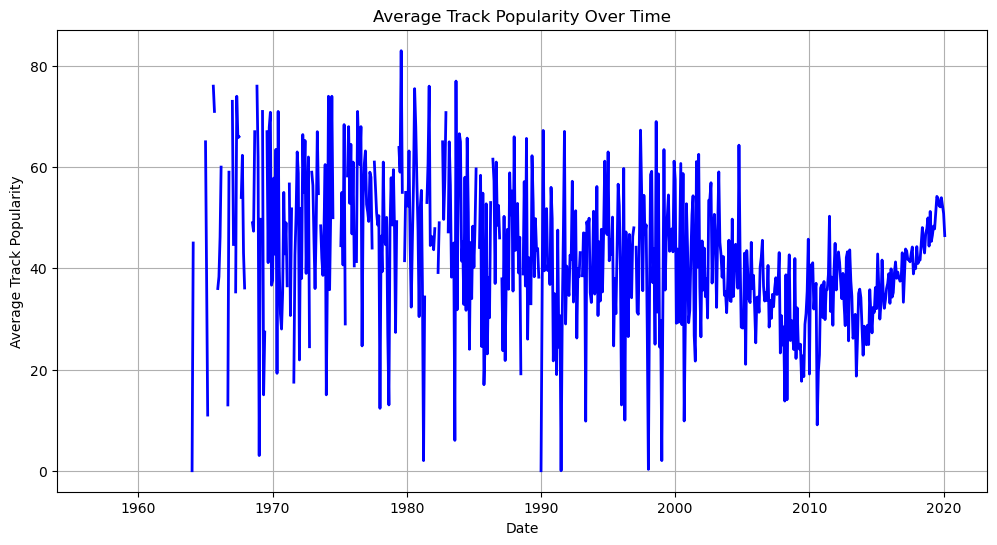

In [40]:
#resamplingg the data by month & calculate the mean popularity
monthly_popularity = spotify_data['track_popularity'].resample('M').mean()

#time series of average track popularity
plt.figure(figsize=(12, 6))
plt.plot(monthly_popularity, color='blue', linestyle='-', linewidth=2)
plt.title('Average Track Popularity Over Time')
plt.xlabel('Date')
plt.ylabel('Average Track Popularity')
plt.grid(True)
plt.show()

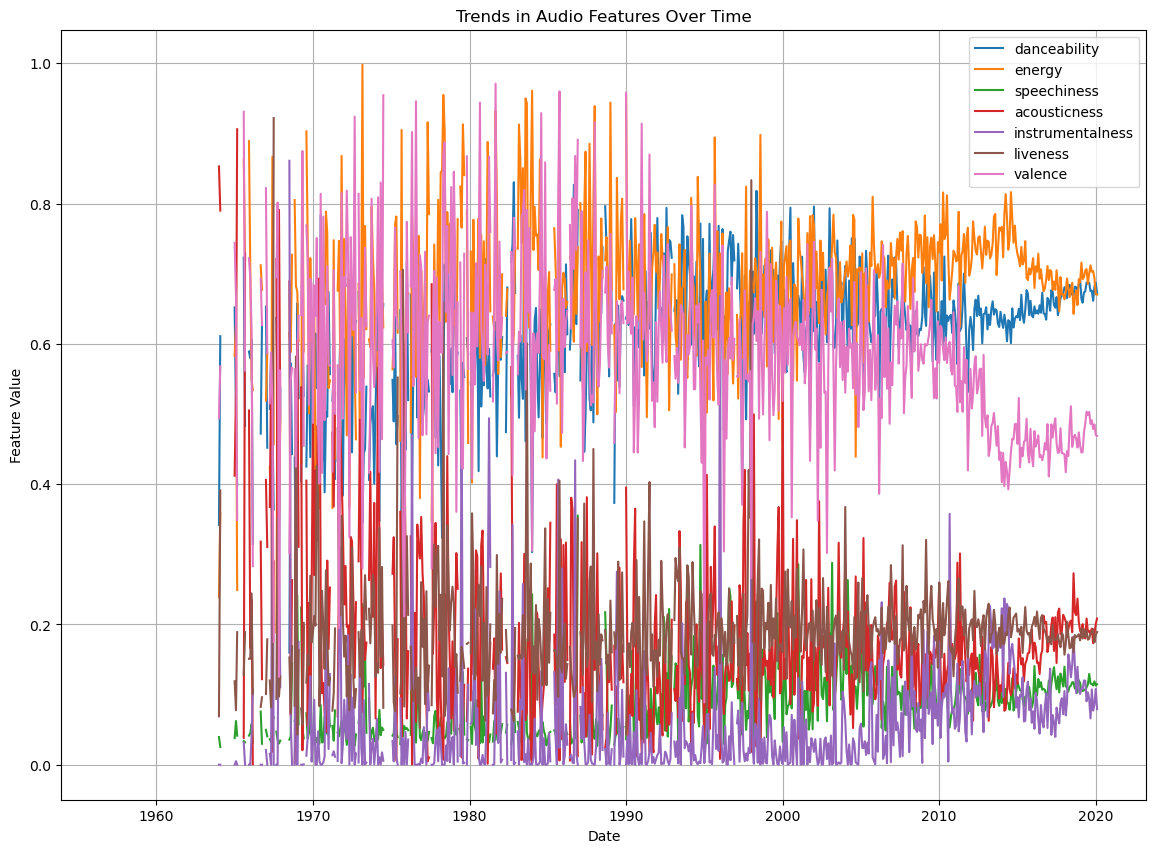

In [41]:
#resampling the data by month & calculate the mean for selected audio features
monthly_features = spotify_data[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']].resample('M').mean()

#time series of selected audio features over time
plt.figure(figsize=(14, 10))
for feature in monthly_features.columns:
    plt.plot(monthly_features.index, monthly_features[feature], label=feature)
plt.title('Trends in Audio Features Over Time')
plt.xlabel('Date')
plt.ylabel('Feature Value')
plt.legend()
plt.grid(True)
plt.show()

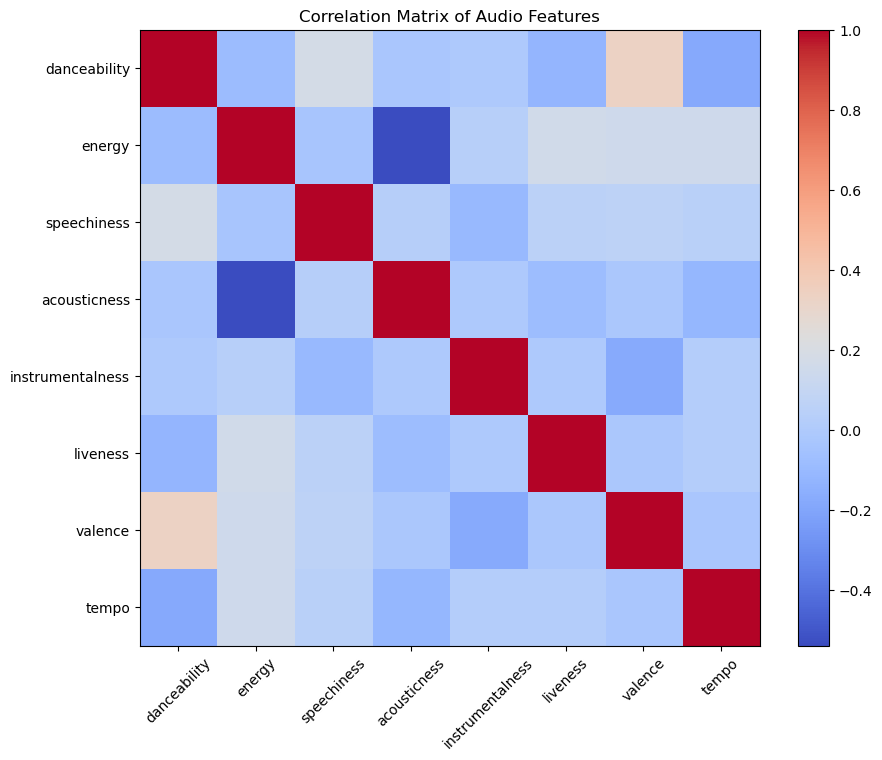

In [42]:
#correlation matrix for the audio features
audio_features = spotify_data[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
correlation_matrix = audio_features.corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix of Audio Features')
plt.show()

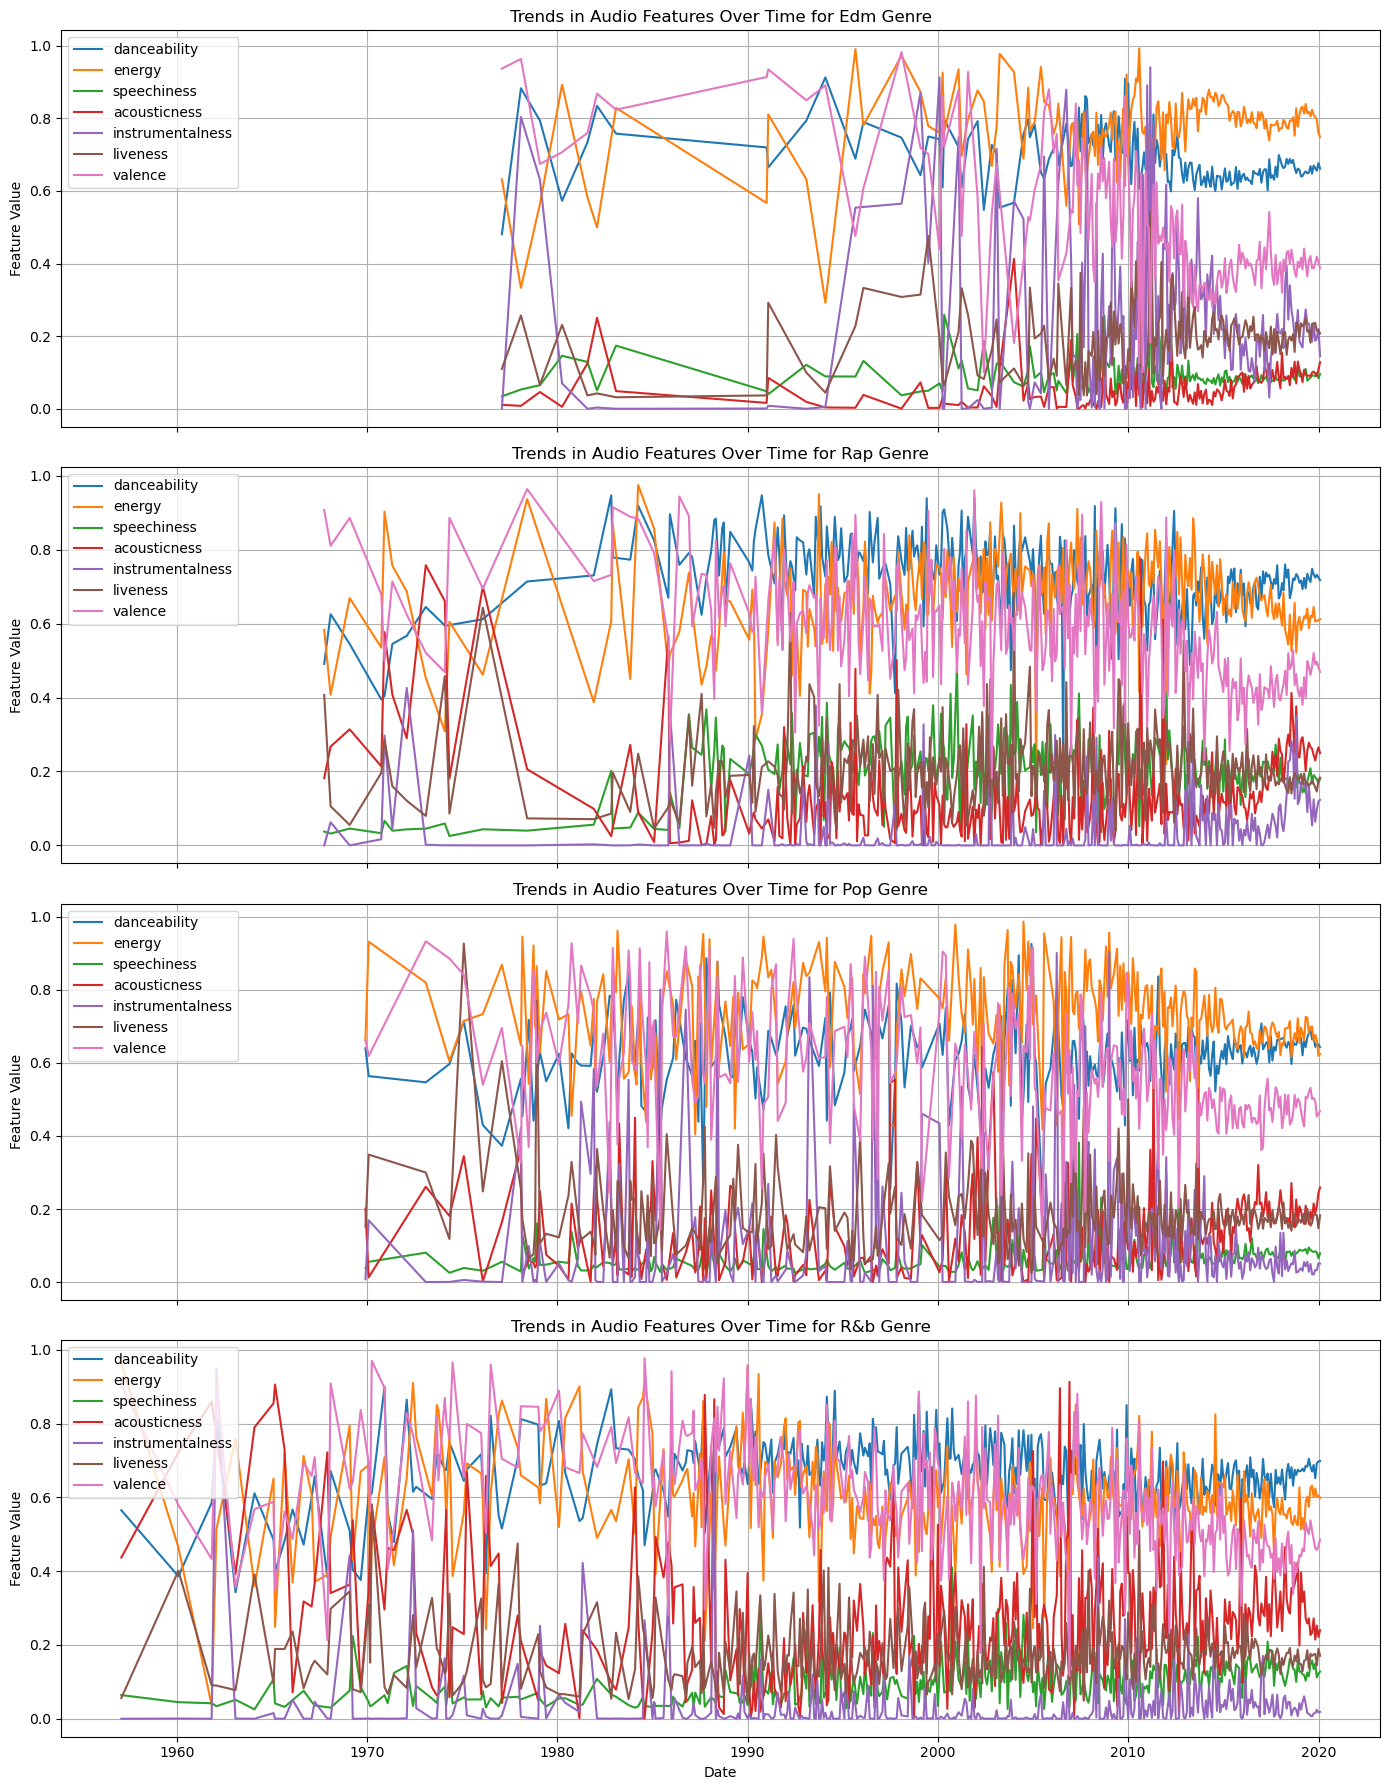

In [43]:
#need to include the 'track_album_release_date'
spotify_data.reset_index(inplace=True)

selected_genres = spotify_data['playlist_genre'].value_counts().index[:4]
genre_data = spotify_data[spotify_data['playlist_genre'].isin(selected_genres)]

#data by month & calculate the mean for selected audio features for each genre
genre_monthly_features = genre_data.groupby(['playlist_genre', pd.Grouper(key='track_album_release_date', freq='M')])[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']].mean().reset_index()

#these are the trends in selected audio features for each genre
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 18), sharex=True)
for i, genre in enumerate(selected_genres):
    genre_specific_data = genre_monthly_features[genre_monthly_features['playlist_genre'] == genre]
    for feature in ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']:
        axes[i].plot(genre_specific_data['track_album_release_date'], genre_specific_data[feature], label=feature)
    axes[i].set_title(f'Trends in Audio Features Over Time for {genre.capitalize()} Genre')
    axes[i].set_ylabel('Feature Value')
    axes[i].legend()
    axes[i].grid(True)
axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()

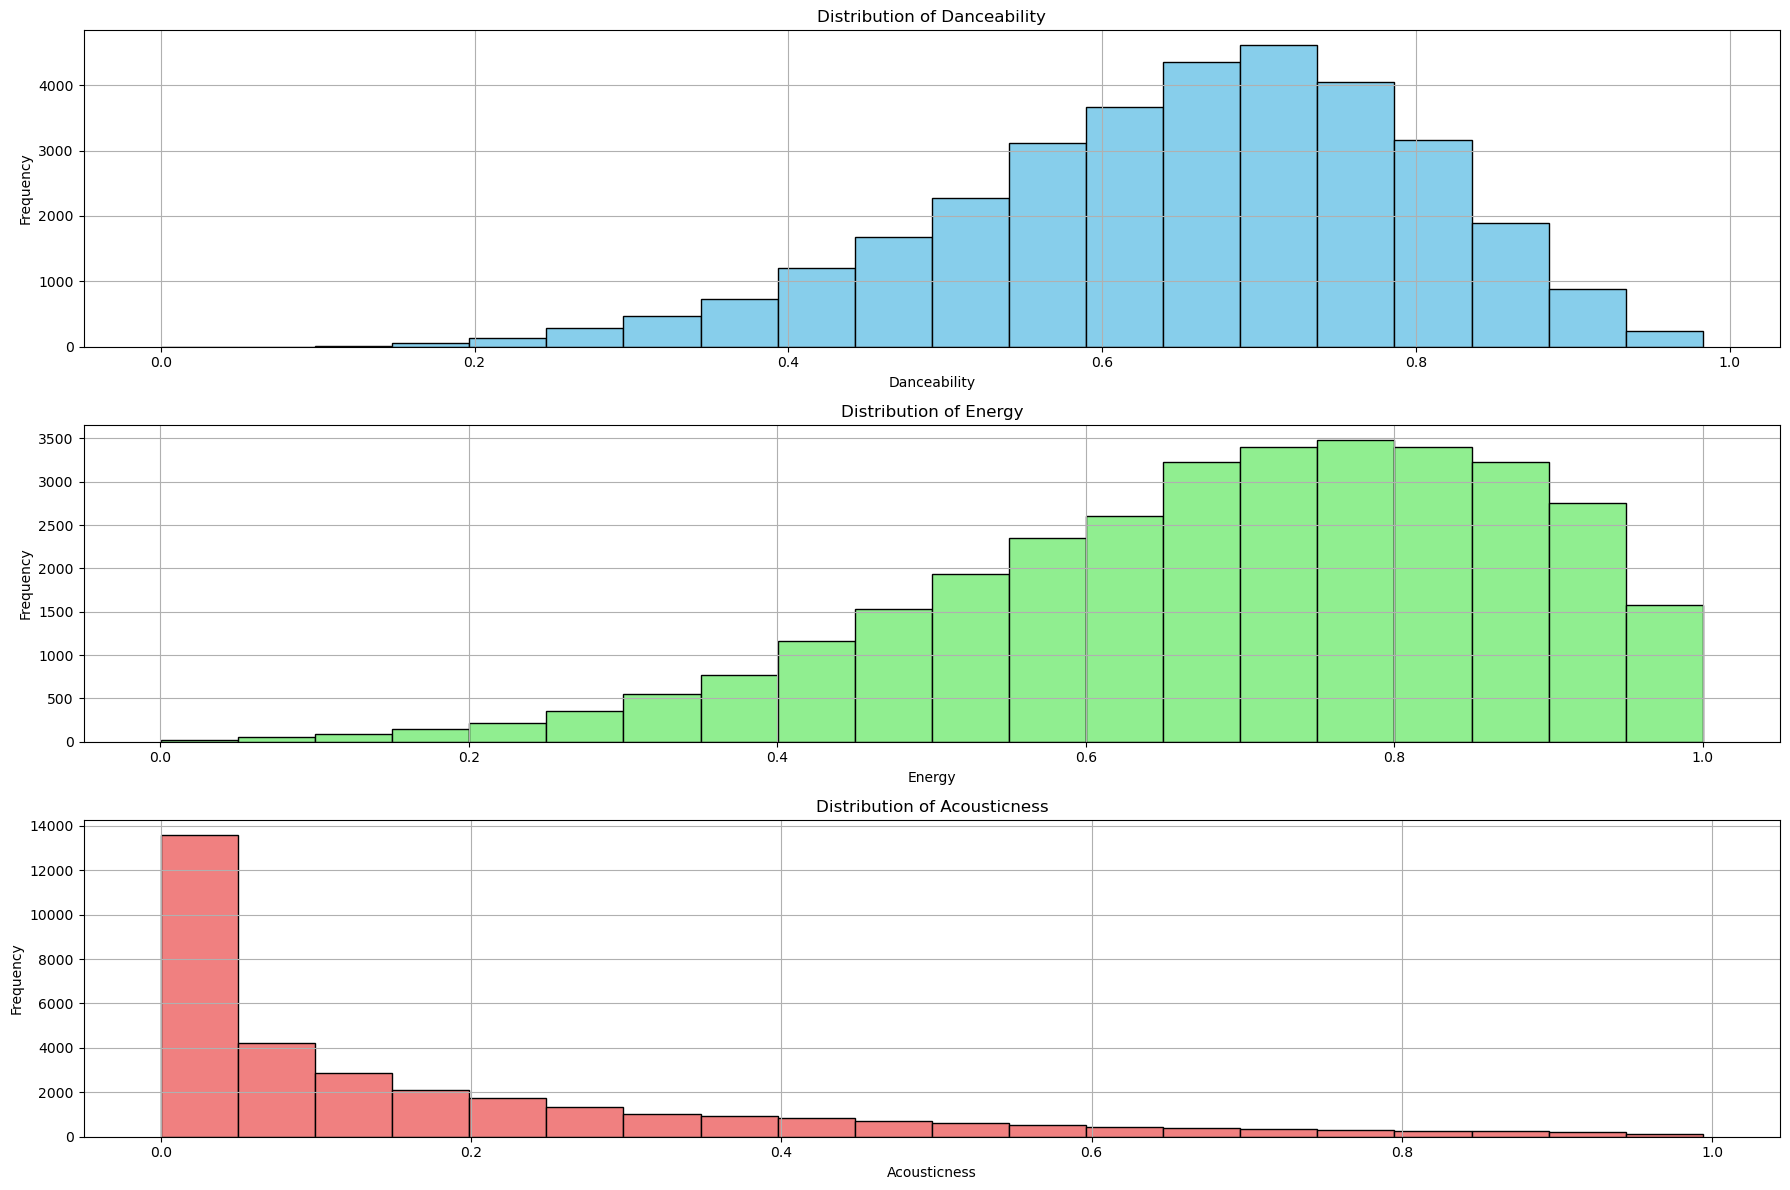

In [44]:
#distributions for danceability, energy, and acousticness
plt.figure(figsize=(18, 12))

#danceability
plt.subplot(3, 1, 1)
plt.hist(spotify_data['danceability'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.grid(True)

#energy
plt.subplot(3, 1, 2)
plt.hist(spotify_data['energy'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Energy')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.grid(True)

#acousticness
plt.subplot(3, 1, 3)
plt.hist(spotify_data['acousticness'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

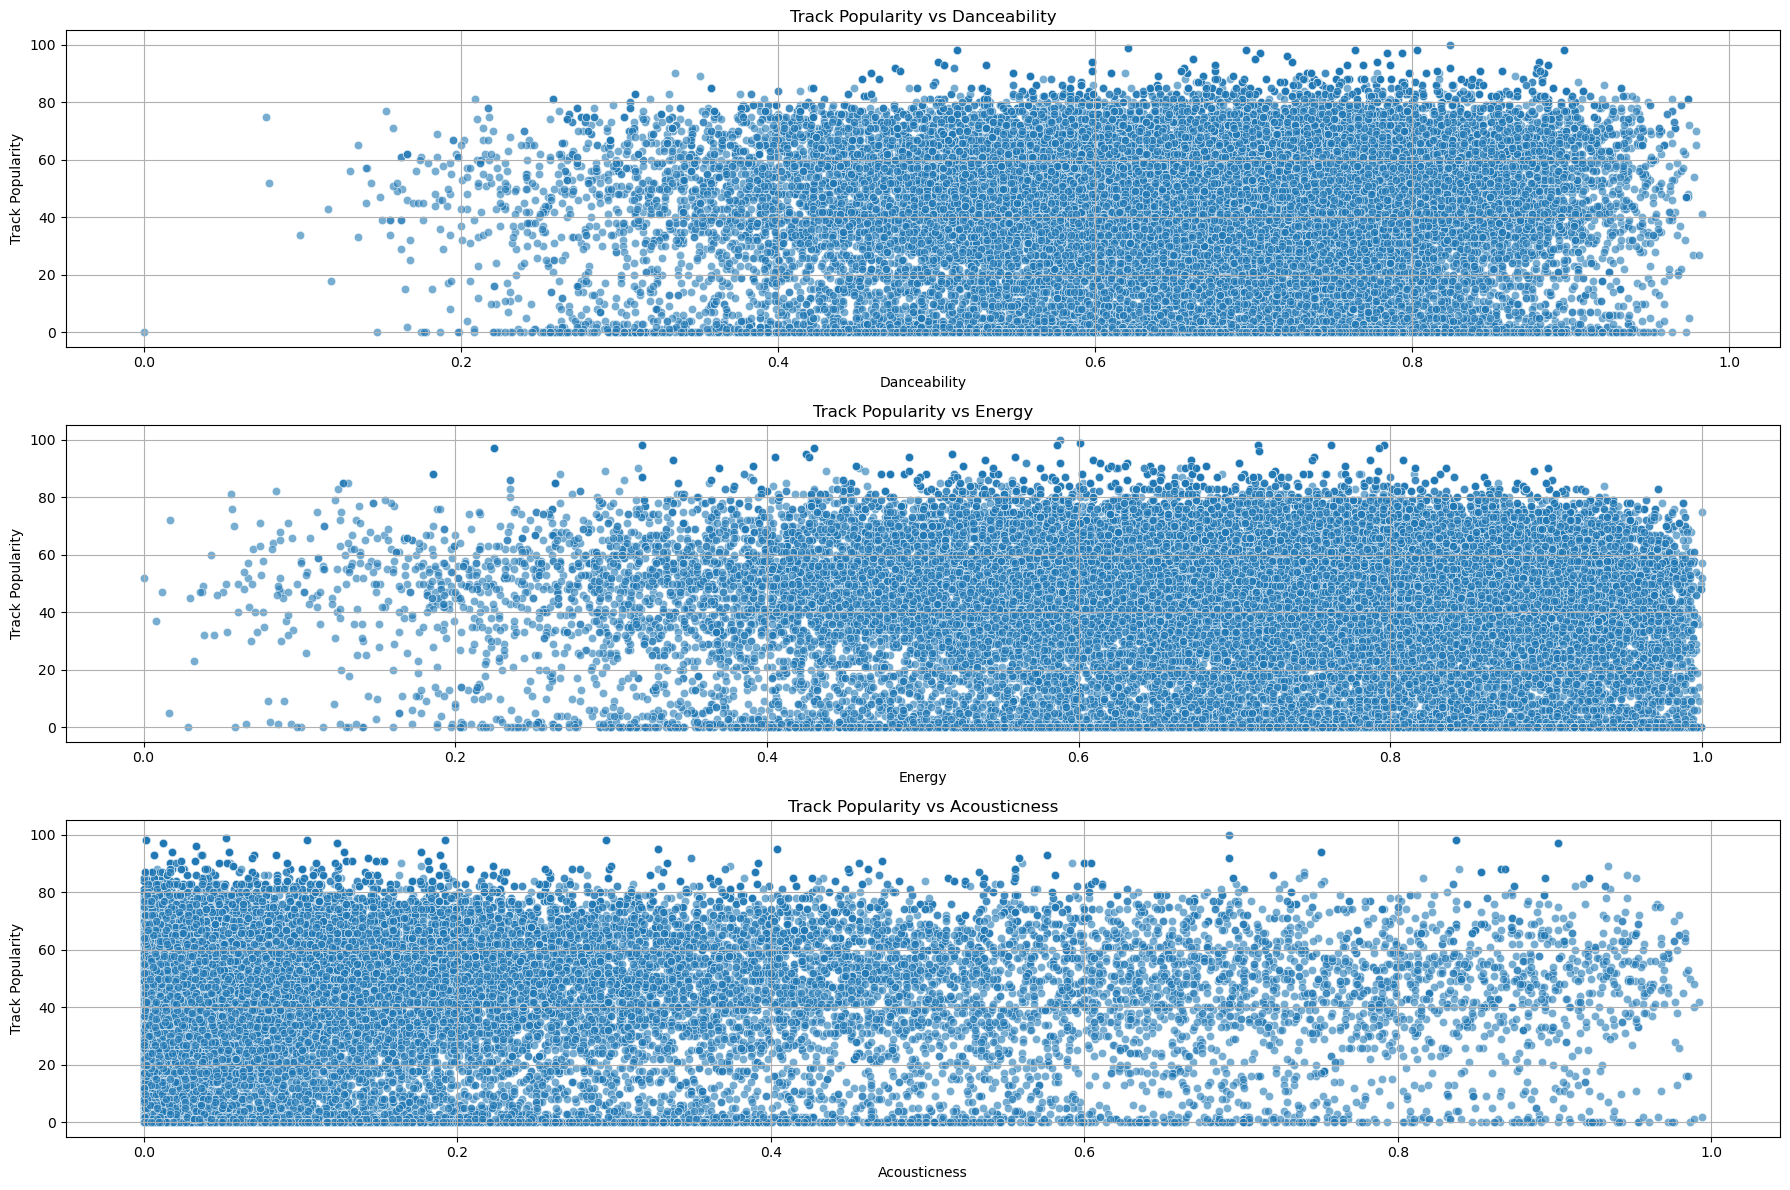

In [45]:
#making scatter plots for popularity vs danceability, energy, and acousticness
plt.figure(figsize=(18, 12))

#popularity v danceability
plt.subplot(3, 1, 1)
plt.scatter(spotify_data['danceability'], spotify_data['track_popularity'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Track Popularity vs Danceability')
plt.xlabel('Danceability')
plt.ylabel('Track Popularity')
plt.grid(True)

#popularity v energy
plt.subplot(3, 1, 2)
plt.scatter(spotify_data['energy'], spotify_data['track_popularity'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Track Popularity vs Energy')
plt.xlabel('Energy')
plt.ylabel('Track Popularity')
plt.grid(True)

#popularity v acousticness
plt.subplot(3, 1, 3)
plt.scatter(spotify_data['acousticness'], spotify_data['track_popularity'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Track Popularity vs Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Track Popularity')
plt.grid(True)

plt.tight_layout()
plt.show()


/var/folders/2g/jwt2v1j97ydg7xjffzdrxfm40000gn/T/ipykernel_16616/761838572.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, 2)
/var/folders/2g/jwt2v1j97ydg7xjffzdrxfm40000gn/T/ipykernel_16616/761838572.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, 3)


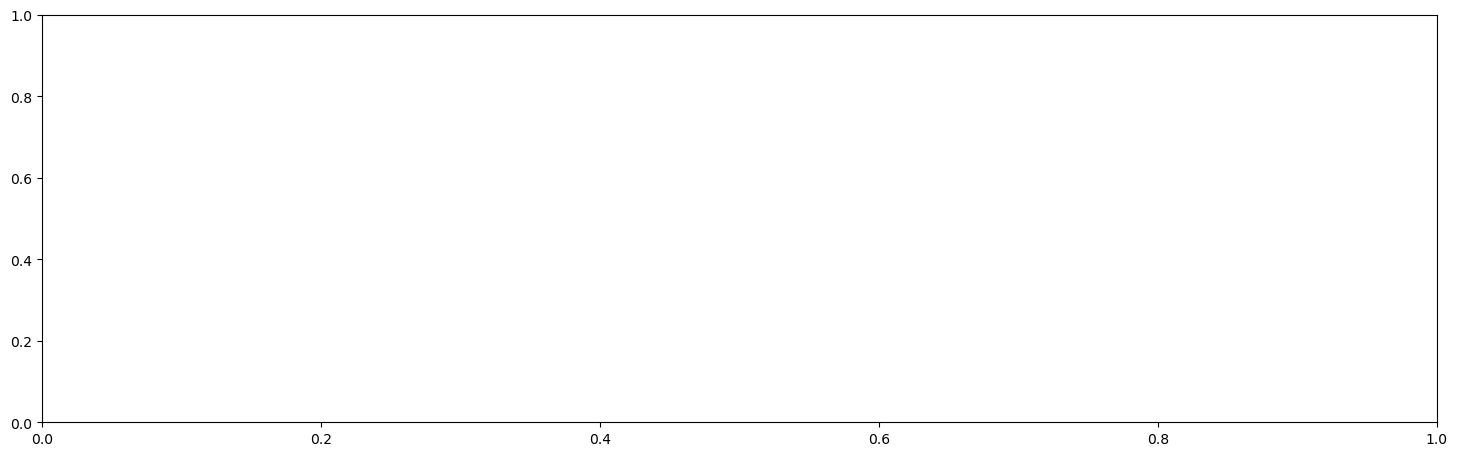

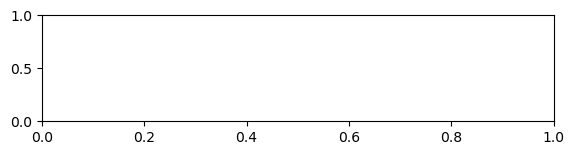

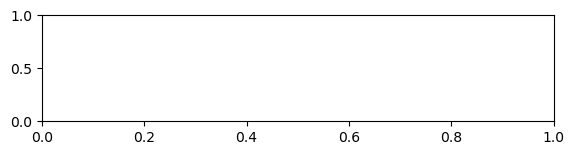

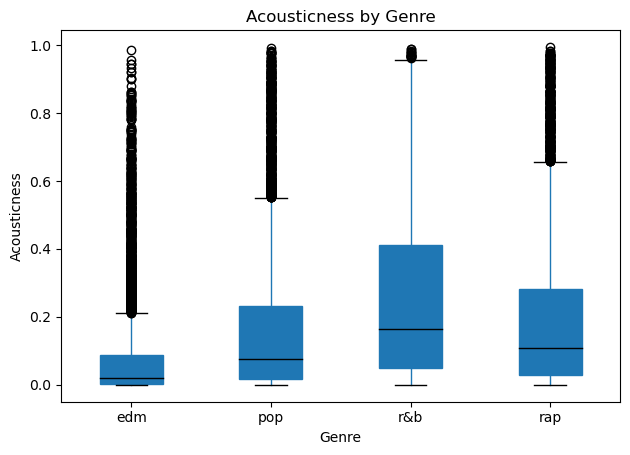

In [46]:
#boxplots for danceability, energy, and acousticness by genre
plt.figure(figsize=(18, 18))

#danceability by genre
plt.subplot(3, 1, 1)
genre_data.boxplot(column='danceability', by='playlist_genre', grid=False, patch_artist=True, medianprops=dict(color='black'))
plt.title('Danceability by Genre')
plt.suptitle('')
plt.xlabel('Genre')
plt.ylabel('Danceability')

#energy by genre
plt.subplot(3, 1, 2)
genre_data.boxplot(column='energy', by='playlist_genre', grid=False, patch_artist=True, medianprops=dict(color='black'))
plt.title('Energy by Genre')
plt.suptitle('')
plt.xlabel('Genre')
plt.ylabel('Energy')

#acousticness by genre
plt.subplot(3, 1, 3)
genre_data.boxplot(column='acousticness', by='playlist_genre', grid=False, patch_artist=True, medianprops=dict(color='black'))
plt.title('Acousticness by Genre')
plt.suptitle('')
plt.xlabel('Genre')
plt.ylabel('Acousticness')

plt.tight_layout()
plt.show()

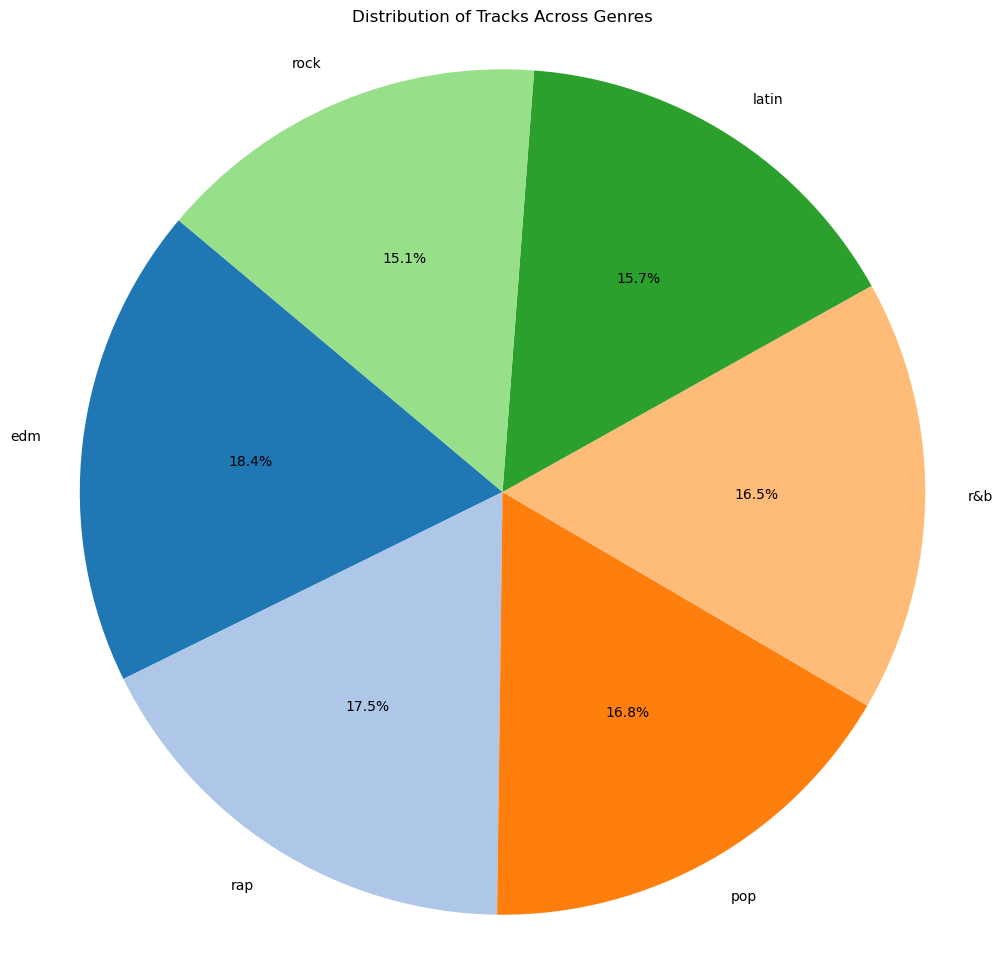

In [47]:
genre_distribution = spotify_data['playlist_genre'].value_counts()

#pie chart for genre distribution
plt.figure(figsize=(12, 12))
plt.pie(genre_distribution, labels=genre_distribution.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Tracks Across Genres')
plt.axis('equal')
plt.show()


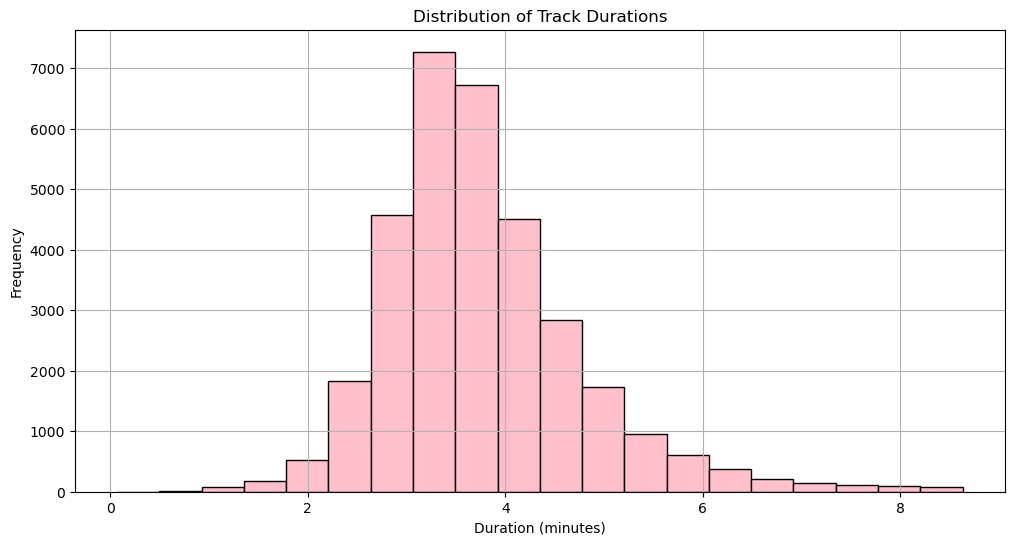

In [48]:
#distribution of track durations
plt.figure(figsize=(12, 6))
plt.hist(spotify_data['duration_ms'] / 60000, bins=20, color='pink', edgecolor='black')
plt.title('Distribution of Track Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Skewness of key variables:
 danceability       -0.504488
energy             -0.636330
acousticness        1.594786
instrumentalness    2.759472
liveness            2.076720
valence            -0.005485
tempo               0.528878
duration_ms         1.149863
dtype: float64


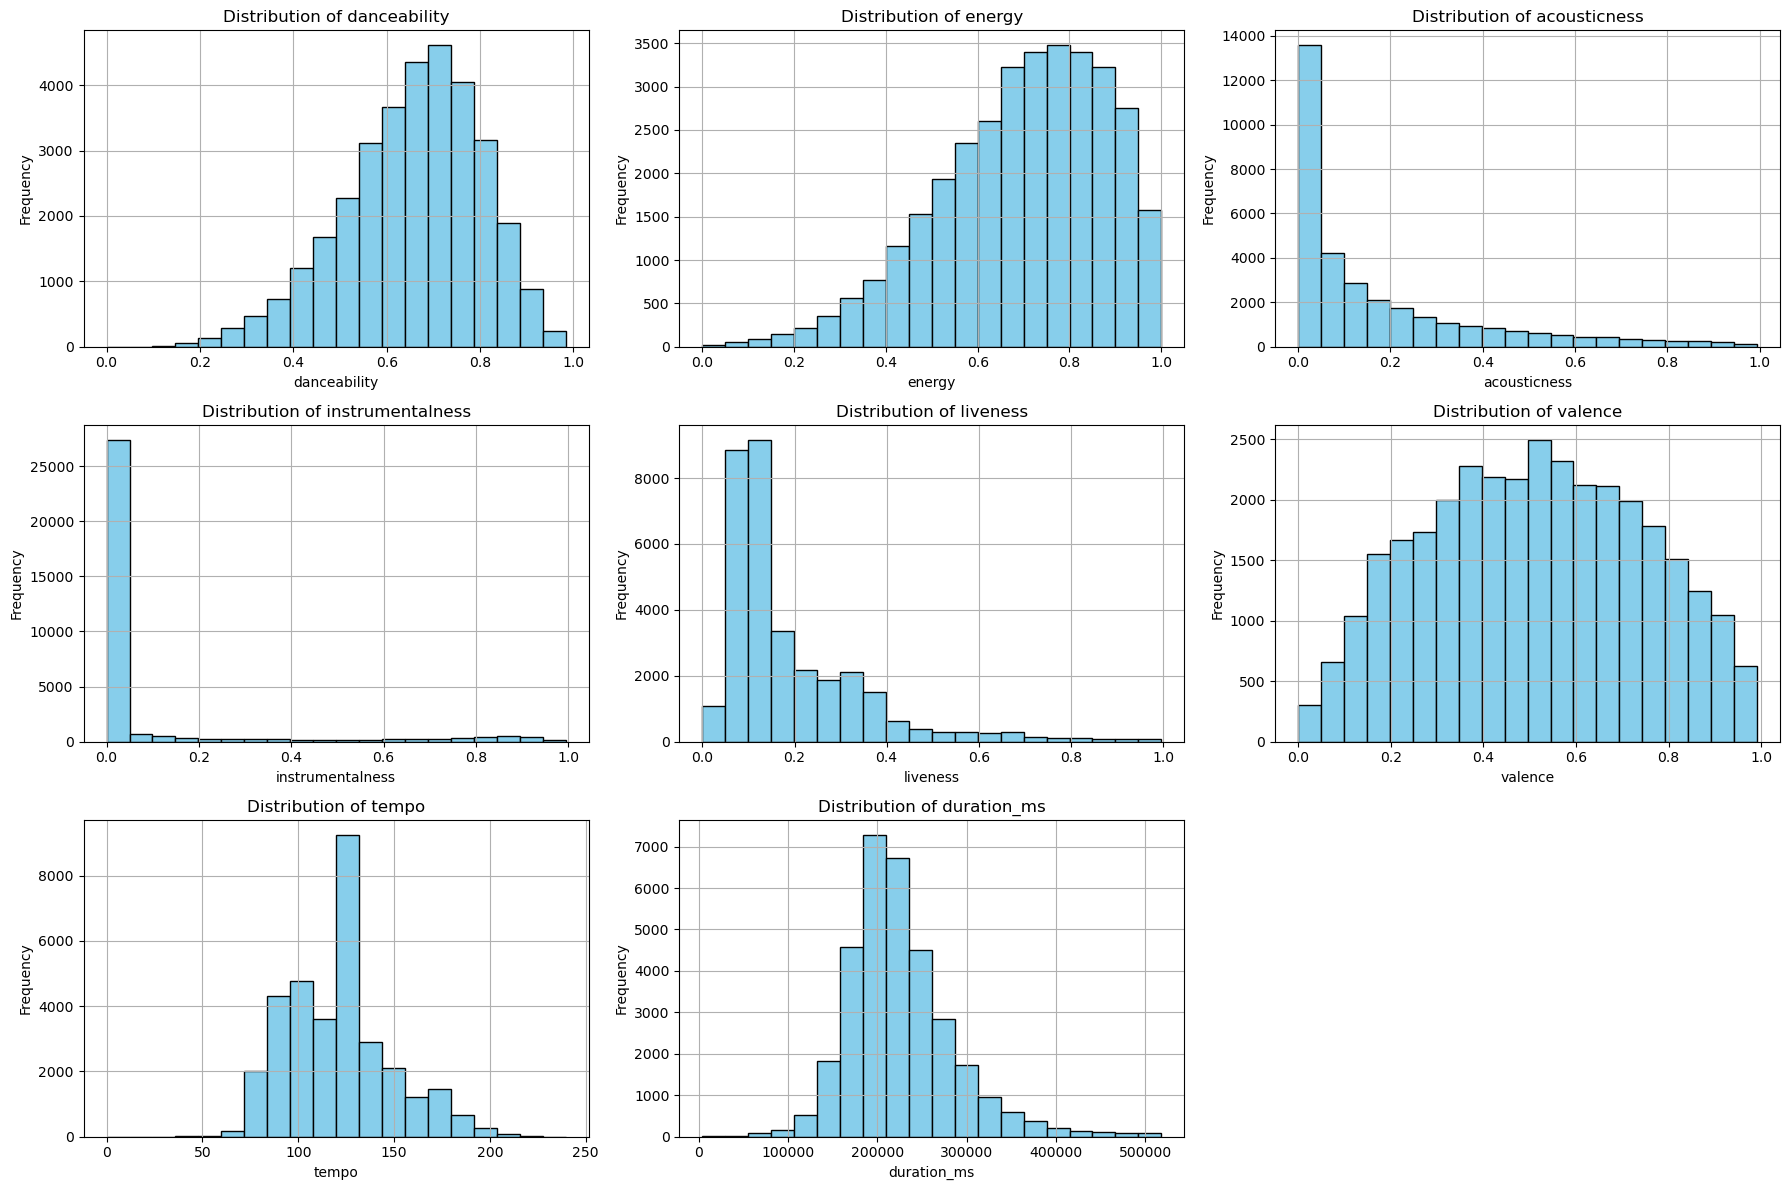

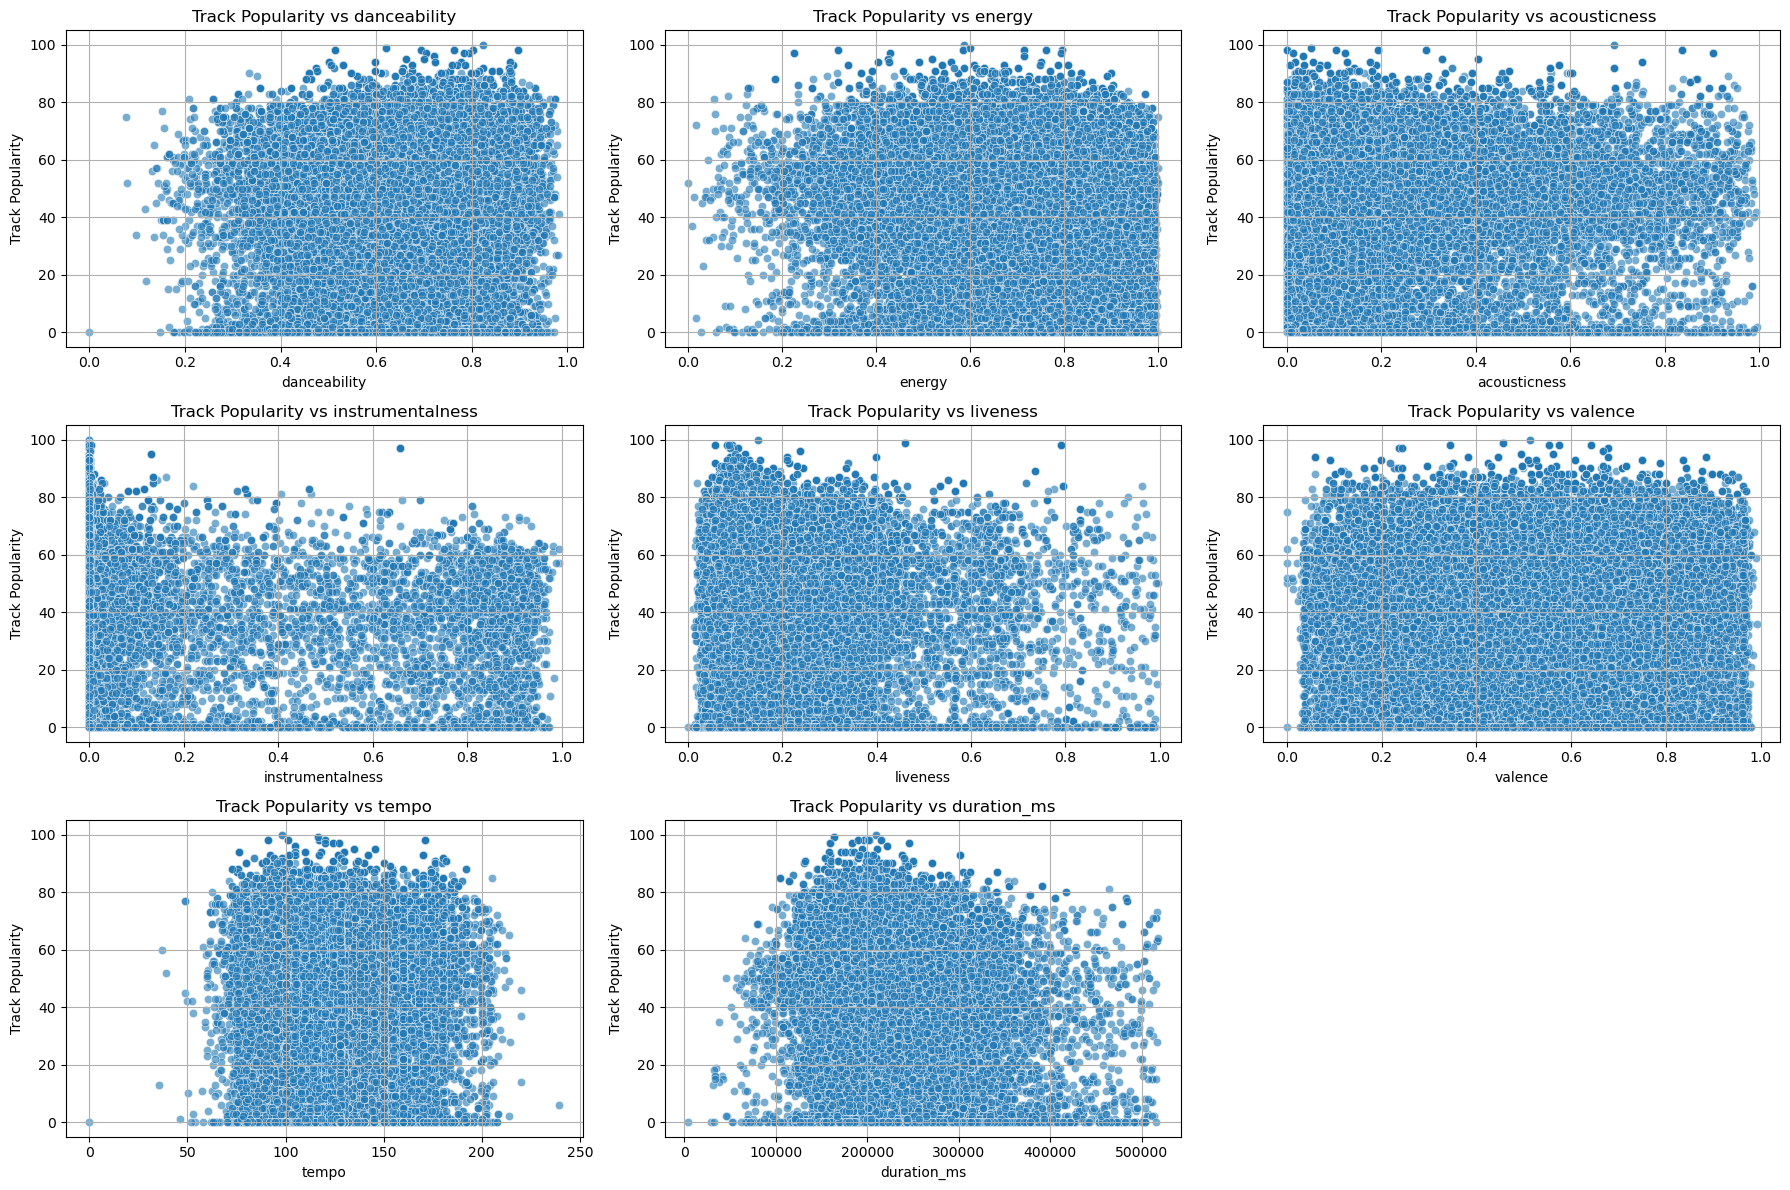

In [49]:
key_variables = ['danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

#calculatint skewness for key variables
skewness = spotify_data[key_variables].skew()
print("Skewness of key variables:\n", skewness)

plt.figure(figsize=(18, 12))
for i, variable in enumerate(key_variables, 1):
    plt.subplot(3, 3, i)
    plt.hist(spotify_data[variable], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)
plt.tight_layout()
plt.show()

#scatter plots for popularity v key variables
plt.figure(figsize=(18, 12))
for i, variable in enumerate(key_variables, 1):
    plt.subplot(3, 3, i)
    plt.scatter(spotify_data[variable], spotify_data['track_popularity'], alpha=0.6, edgecolors='w', linewidth=0.5)
    plt.title(f'Track Popularity vs {variable}')
    plt.xlabel(variable)
    plt.ylabel('Track Popularity')
    plt.grid(True)
plt.tight_layout()
plt.show()

### Transformations (do we need these??)

In [50]:
#log transformation to highly skewed variables
spotify_data['acousticness_log'] = np.log1p(spotify_data['acousticness'])
spotify_data['instrumentalness_log'] = np.log1p(spotify_data['instrumentalness'])
spotify_data['liveness_log'] = np.log1p(spotify_data['liveness'])
spotify_data['duration_log'] = np.log1p(spotify_data['duration_ms'])

#square root transformation to moderately skewed variables
spotify_data['danceability_sqrt'] = np.sqrt(spotify_data['danceability'])
spotify_data['energy_sqrt'] = np.sqrt(spotify_data['energy'])
spotify_data['tempo_sqrt'] = np.sqrt(spotify_data['tempo'])